In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
path = '/Users/maddie/Library/CloudStorage/GoogleDrive-medeirosmm@merrimack.edu/My Drive/python/python_practice/palmerpenguins_extended.csv'
df = pd.read_csv(path)
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021


# Exploring data

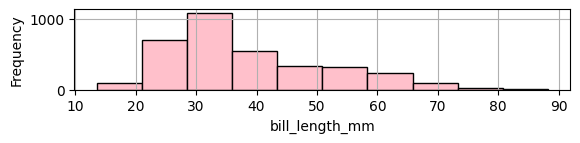

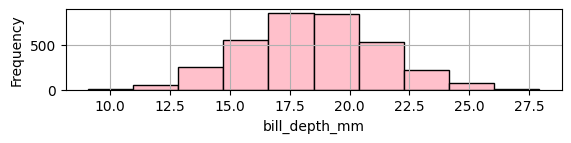

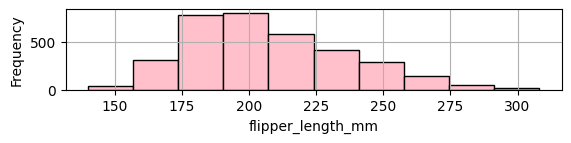

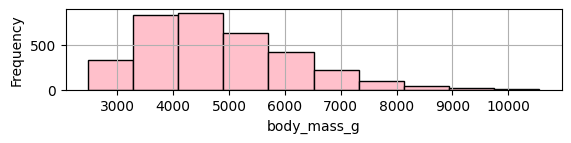

In [20]:
cate = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for index, col in enumerate(cate, start=1):
    plt.subplot(4,1,index)
    plt.hist(df[col], color='pink', edgecolor='black')
    plt.grid(True)
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.show()


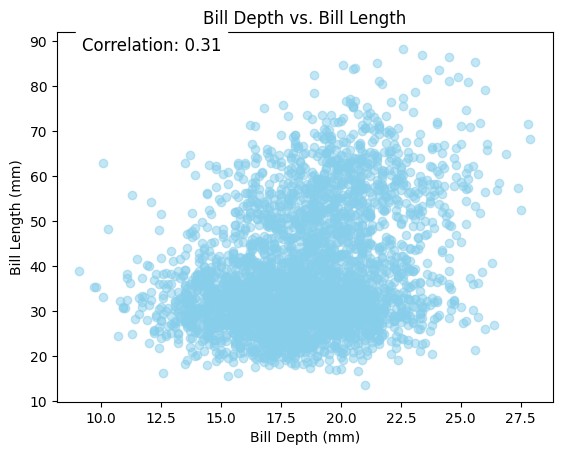

In [21]:
correlation = df['bill_depth_mm'].corr(df['bill_length_mm'])
correlation_text = f'Correlation: {correlation:.2f}'
plt.scatter(df['bill_depth_mm'], df['bill_length_mm'], color='skyblue', alpha = 0.5)
# Adding title and labels
plt.title('Bill Depth vs. Bill Length')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Bill Length (mm)')

# Annotating with correlation
plt.annotate(correlation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, backgroundcolor='white')

plt.show()

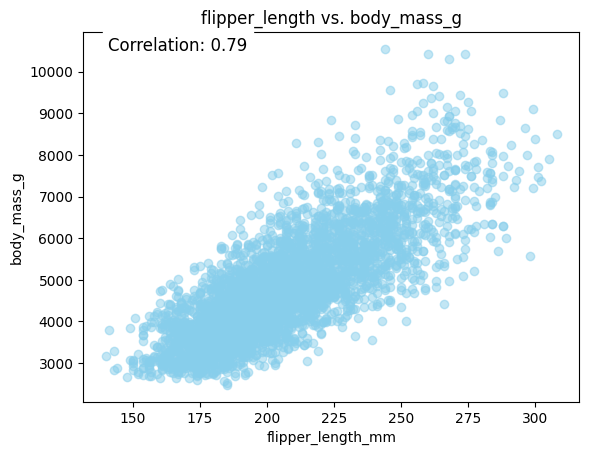

In [22]:
correlation = df['flipper_length_mm'].corr(df['body_mass_g'])
correlation_text1 = f'Correlation: {correlation:.2f}'
plt.scatter(df['flipper_length_mm'], df['body_mass_g'], color='skyblue', alpha = 0.5)
# Adding title and labels
plt.title('flipper_length vs. body_mass_g')
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')

# Annotating with correlation
plt.annotate(correlation_text1, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, backgroundcolor='white')

plt.show()

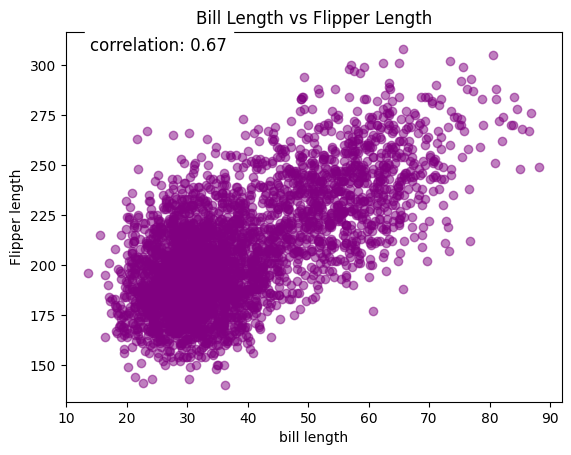

In [23]:
cor = df['bill_length_mm'].corr(df['flipper_length_mm'])
cor_tex = f'correlation: {cor:.2f}'
plt.scatter(df['bill_length_mm'], df['flipper_length_mm'], color= 'purple', alpha=0.5)
plt.xlabel('bill length')
plt.ylabel('Flipper length')
plt.title('Bill Length vs Flipper Length')
plt.annotate(cor_tex, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, backgroundcolor='white')
plt.show()

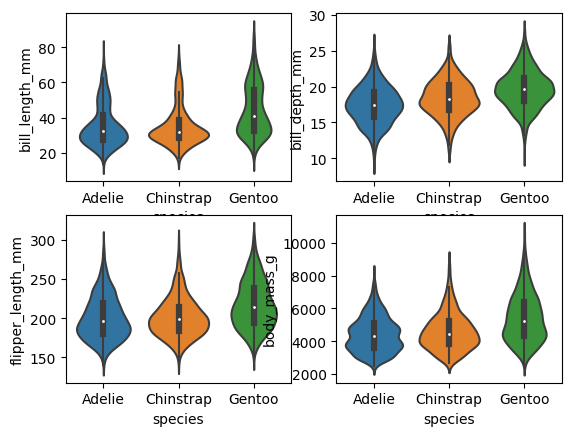

In [24]:
import seaborn as sns
for index, col in enumerate(cate, start=1):
    plt.subplot(2,2,index)
    sns.violinplot(data=df,x='species', y=col)

/Users/maddie/anaconda3/envs/maddie/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Mass in different diets')

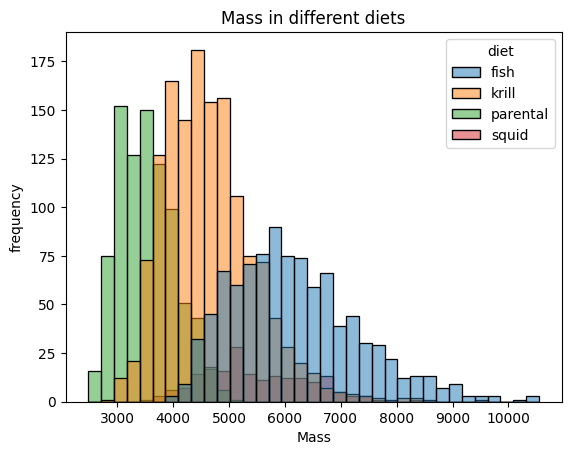

In [25]:
sns.histplot(data=df, x='body_mass_g', hue='diet')
plt.xlabel('Mass')
plt.ylabel('frequency')
plt.title('Mass in different diets')

# Prep Data

1. Handle Missing Data
2. Convert categorical variables to numeric
3. split data

In [26]:
#cleaning

#drops na only from health metrics col
dfs = df.dropna(subset=['health_metrics'])

#replaces null values the the value from the previous row
dfs= dfs.fillna(method='ffill')



/var/folders/pq/d2n7h1c17_g82klk3ml6_9kh0000gn/T/ipykernel_52999/2844764925.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfs= dfs.fillna(method='ffill')


In [27]:
dfs.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#holds cat variables 
cat_cols = ['species', 'island', 'sex', 'diet', 'life_stage']

#preprocessing class from preprocessing module usually outputs as sparse matrix but we told it for an array
#basically this is making the encoder object exisit in our code
encoder = OneHotEncoder(sparse=False)

#fits encoder to data and transforms to one hot encoded format [0001]
#returns an array
# fit() learns what categories exist transform changes it to numeric format
encoded_data = encoder.fit_transform(df[cat_cols])

#converts the array into a dataframe
#sets the columns goes name frojm list first and then the category
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(cat_cols))

#drop category columns
df = df.drop(columns=cat_cols)

#make new df with our new columns
df = pd.concat([df,encoded_df], axis = 1)

df


/Users/maddie/anaconda3/envs/maddie/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,health_metrics,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,...,island_Torgensen,sex_female,sex_male,diet_fish,diet_krill,diet_parental,diet_squid,life_stage_adult,life_stage_chick,life_stage_juvenile
0,53.4,17.8,219.0,5687.0,overweight,2021,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,49.3,18.1,245.0,6811.0,overweight,2021,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,55.7,16.6,226.0,5388.0,overweight,2021,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,38.0,15.6,221.0,6262.0,overweight,2021,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,60.7,17.9,177.0,4811.0,overweight,2021,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,44.0,20.4,252.0,6447.0,healthy,2025,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3426,54.5,25.2,245.0,6872.0,healthy,2025,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3427,51.4,20.4,258.0,7409.0,overweight,2025,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3428,55.9,20.5,247.0,6491.0,healthy,2025,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# Splitting Data

classifcation model
- logisitc regression: p(x) = 1 / [e - (a+bx)+1]
https://www.sciencedirect.com/topics/mathematics/logistic-regression-model#:~:text=then%20the%20experiments%20are%20said,0%20as%20x%20%E2%86%92%20%E2%88%9E%20.
- decisson tree

In [29]:
X = df.drop('health_metrics', axis=1)
y = df['health_metrics']

# First split: Splitting into training and temporary set (temp set will be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% training, 40% temp

# Second split: Splitting the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into 50% validation, 50% test


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Logisic regression

In [31]:
#intatilzes logistic regression
log_reg = LogisticRegression(random_state=42)

#train
log_reg.fit(X_train, y_train)

#predict w/ logistic
val_prediction_lr = log_reg.predict(X_val)

# Evaluate Logistic Regression
val_accuracy_lr = accuracy_score(y_val, val_prediction_lr)
print(f'Validation Accuracy for Logistic Regression: {val_accuracy_lr:.2f}')
print(classification_report(y_val, val_prediction_lr))

Validation Accuracy for Logistic Regression: 0.62
              precision    recall  f1-score   support

     healthy       0.57      0.74      0.64       313
  overweight       0.75      0.69      0.72       228
 underweight       0.53      0.23      0.33       145

    accuracy                           0.62       686
   macro avg       0.61      0.56      0.56       686
weighted avg       0.62      0.62      0.60       686



/Users/maddie/anaconda3/envs/maddie/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree

In [32]:
# Initialize Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Train Decision Tree
decision_tree.fit(X_train, y_train)

# Predictions with Decision Tree
val_predictions_dt = decision_tree.predict(X_val)

# Evaluate Decision Tree
val_accuracy_dt = accuracy_score(y_val, val_predictions_dt)
print(f'Validation Accuracy for Decision Tree: {val_accuracy_dt:.2f}')
print(classification_report(y_val, val_predictions_dt))

Validation Accuracy for Decision Tree: 0.87
              precision    recall  f1-score   support

     healthy       0.85      0.87      0.86       313
  overweight       0.87      0.89      0.88       228
 underweight       0.90      0.84      0.87       145

    accuracy                           0.87       686
   macro avg       0.88      0.87      0.87       686
weighted avg       0.87      0.87      0.87       686



# K-nearest Neighbors 

In [33]:
from sklearn.neighbors import KNeighborsClassifier

#initalizes 
knn = KNeighborsClassifier(n_neighbors=5)

#train
knn.fit(X_train, y_train)

#predict
y_pred = knn.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Detailed classification report
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.61
              precision    recall  f1-score   support

     healthy       0.59      0.69      0.64       313
  overweight       0.68      0.68      0.68       228
 underweight       0.49      0.31      0.38       145

    accuracy                           0.61       686
   macro avg       0.59      0.56      0.57       686
weighted avg       0.60      0.61      0.60       686



# Results

In [34]:
print(list)

<class 'list'>


In [35]:
model_acc = {}

model_acc['Decision Tree'] = val_accuracy_dt
model_acc['Logistic Regression'] = val_accuracy_lr
model_acc['KNN'] = accuracy

# Convert the dictionary into a DataFrame
results = pd.DataFrame(list(model_acc.items()), columns=['Model', 'Accuracy'])
results

,Model,Accuracy
0,Decision Tree,0.870262
1,Logistic Regression,0.618076
2,KNN,0.607872


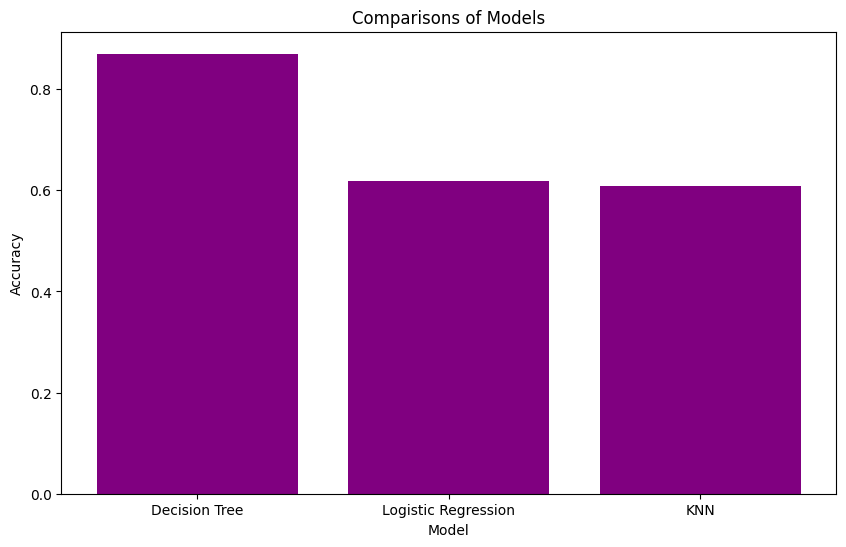

In [38]:
plt.figure(figsize=(10,6))
plt.bar(results['Model'], results['Accuracy'], color='purple')
plt.title('Comparisons of Models')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

# Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score

#cv specifies number of folds

# Decision Tree cross-validation
dt_scores = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (dt_scores.mean(), dt_scores.std() * 2))

# Logistic Regression cross-validation
lr_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (lr_scores.mean(), lr_scores.std() * 2))

# KNN cross-validation
knn_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

Decision Tree Accuracy: 0.93 (+/- 0.02)
Logistic Regression Accuracy: 0.66 (+/- 0.03)
KNN Accuracy: 0.63 (+/- 0.03)


/Users/maddie/anaconda3/envs/maddie/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/maddie/anaconda3/envs/maddie/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

# Feature Importance

Text(0.5, 1.0, 'Importance of Features in Decision Tree')

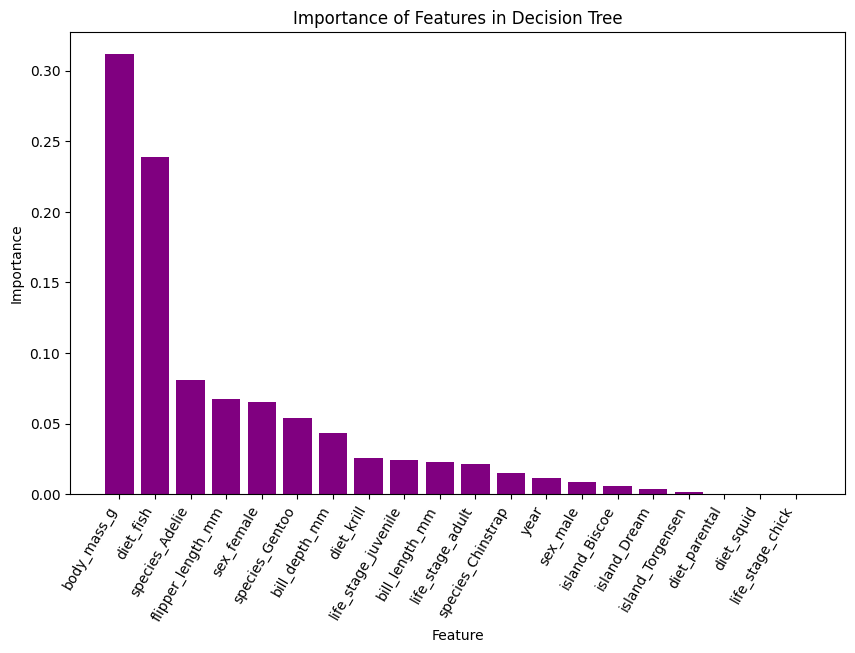

In [53]:
importances = decision_tree.feature_importances_
feature_names = X_train.columns
feat_import = pd.DataFrame(importances, index=feature_names, columns = ["Importance"]).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,6))
plt.bar(feat_import.index, feat_import["Importance"], color='purple')
plt.xlabel('Feature')
plt.xticks(rotation=60, ha='right')
plt.ylabel('Importance')
plt.title("Importance of Features in Decision Tree")

# Visualize Tree

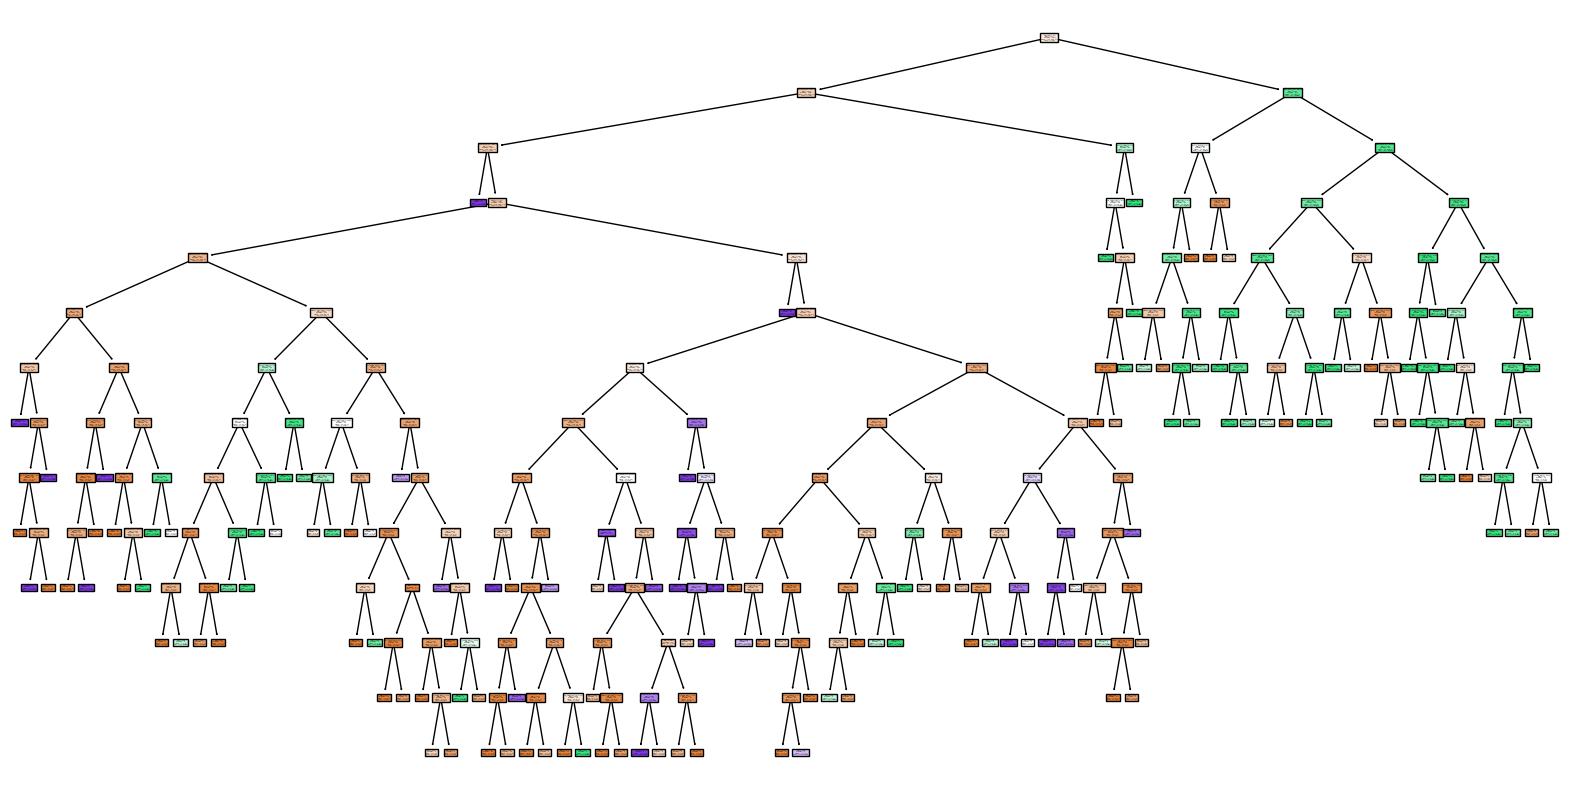

In [80]:
from sklearn.tree import plot_tree

pruned_tree = DecisionTreeClassifier(max_depth=13, min_samples_leaf=5, random_state=42)
pruned_tree.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(pruned_tree, filled=True, feature_names=X.columns, class_names=['Healthy', 'Over Weight', 'Under Weight'])
plt.show()

In [81]:
# Predictions with Decision Tree
val_predictions_pt = pruned_tree.predict(X_val)

# Evaluate Decision Tree
val_accuracy_pt = accuracy_score(y_val, val_predictions_pt)
print(f'Validation Accuracy for Decision Tree: {val_accuracy_pt:.2f}')
print(classification_report(y_val, val_predictions_pt))

Validation Accuracy for Decision Tree: 0.85
              precision    recall  f1-score   support

     healthy       0.82      0.87      0.85       313
  overweight       0.87      0.87      0.87       228
 underweight       0.90      0.79      0.84       145

    accuracy                           0.85       686
   macro avg       0.87      0.84      0.85       686
weighted avg       0.86      0.85      0.85       686



In [82]:

#prune Tree cross-validation
pt_scores = cross_val_score(pruned_tree, X, y, cv=5, scoring='accuracy')
print("Pruned Tree Accuracy: %0.2f (+/- %0.2f)" % (pt_scores.mean(), pt_scores.std() * 2))


Pruned Tree Accuracy: 0.92 (+/- 0.03)


# Experimenting with depth and min tree leaf

Increasing the depth beyond 13 provides negligible gains in accuracy and considering the principles of parsimony (simpler models are preferable when performance is similar), depth 13 is recommended. It offers high accuracy while potentially avoiding the extra computational cost and complexity of deeper trees.



In [75]:
for depth in range(3, 20):  # Example range, adjust based on your context
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    cv_scores = cross_val_score(tree, X, y, cv=5)
    print(f"Depth: {depth}, CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

Depth: 3, CV Accuracy: 0.664 ± 0.014
Depth: 4, CV Accuracy: 0.703 ± 0.020
Depth: 5, CV Accuracy: 0.734 ± 0.015
Depth: 6, CV Accuracy: 0.778 ± 0.016
Depth: 7, CV Accuracy: 0.817 ± 0.019
Depth: 8, CV Accuracy: 0.853 ± 0.015
Depth: 9, CV Accuracy: 0.885 ± 0.011
Depth: 10, CV Accuracy: 0.905 ± 0.013
Depth: 11, CV Accuracy: 0.912 ± 0.016
Depth: 12, CV Accuracy: 0.921 ± 0.011
Depth: 13, CV Accuracy: 0.926 ± 0.011
Depth: 14, CV Accuracy: 0.925 ± 0.011
Depth: 15, CV Accuracy: 0.926 ± 0.011
Depth: 16, CV Accuracy: 0.924 ± 0.010
Depth: 17, CV Accuracy: 0.925 ± 0.011
Depth: 18, CV Accuracy: 0.925 ± 0.010
Depth: 19, CV Accuracy: 0.926 ± 0.011


In [86]:
for sample_leaf in range(1,30):
    trees =  DecisionTreeClassifier(max_depth=13, random_state=42, min_samples_leaf=sample_leaf)
    cross_val =cross_val_score(trees, X, y, cv=5)
    print(f"Tree leaf {sample_leaf}, CV Accurracy {cross_val.mean():.3f} ± {cross_val.std():.3f}")

Tree leaf 1, CV Accurracy 0.926 ± 0.011
Tree leaf 2, CV Accurracy 0.922 ± 0.013
Tree leaf 3, CV Accurracy 0.916 ± 0.008
Tree leaf 4, CV Accurracy 0.919 ± 0.012
Tree leaf 5, CV Accurracy 0.917 ± 0.015
Tree leaf 6, CV Accurracy 0.910 ± 0.013
Tree leaf 7, CV Accurracy 0.908 ± 0.015
Tree leaf 8, CV Accurracy 0.901 ± 0.011
Tree leaf 9, CV Accurracy 0.898 ± 0.010
Tree leaf 10, CV Accurracy 0.884 ± 0.010
Tree leaf 11, CV Accurracy 0.880 ± 0.016
Tree leaf 12, CV Accurracy 0.874 ± 0.014
Tree leaf 13, CV Accurracy 0.874 ± 0.015
Tree leaf 14, CV Accurracy 0.859 ± 0.016
Tree leaf 15, CV Accurracy 0.853 ± 0.021
Tree leaf 16, CV Accurracy 0.850 ± 0.020
Tree leaf 17, CV Accurracy 0.843 ± 0.018
Tree leaf 18, CV Accurracy 0.842 ± 0.018
Tree leaf 19, CV Accurracy 0.832 ± 0.015
Tree leaf 20, CV Accurracy 0.836 ± 0.018
Tree leaf 21, CV Accurracy 0.835 ± 0.018
Tree leaf 22, CV Accurracy 0.829 ± 0.013
Tree leaf 23, CV Accurracy 0.826 ± 0.015
Tree leaf 24, CV Accurracy 0.825 ± 0.015
Tree leaf 25, CV Accurrac

Test Accuracy: 0.61
